In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


# **Data Preparation**

**Data Overview**

In [2]:
import numpy as np
import pandas as pd

**Data Description**

In [3]:
transaction_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')
identity_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_identity.csv')

In [4]:
id_cols = ['card1','card2','card3','card4','card5','card6','ProductCD','addr1','addr2','P_emaildomain','R_emaildomain']
cat_cols = ['M1','M2','M3','M4','M5','M6','M7','M8','M9']
train_data_ratio = 0.8

In [5]:
n_train = int(transaction_df.shape[0]*train_data_ratio)
test_ids = transaction_df.TransactionID.values[n_train:]

In [6]:
get_fraud_frac = lambda series: 100 * sum(series)/len(series)
print("Percent fraud for train transactions: {}".format(get_fraud_frac(transaction_df.isFraud[:n_train])))
print("Percent fraud for test transactions: {}".format(get_fraud_frac(transaction_df.isFraud[n_train:])))
print("Percent fraud for all transactions: {}".format(get_fraud_frac(transaction_df.isFraud)))

Percent fraud for train transactions: 3.5135215226741625
Percent fraud for test transactions: 3.4409184813899145
Percent fraud for all transactions: 3.499000914417313


In [7]:
with open('/kaggle/working/test.csv', 'w') as f:
    f.writelines(map(lambda x: str(x) + "\n", test_ids))

In [8]:
non_feature_cols = ['isFraud', 'TransactionDT'] + id_cols
print(non_feature_cols)

['isFraud', 'TransactionDT', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'ProductCD', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain']


In [9]:
feature_cols = [col for col in transaction_df.columns if col not in non_feature_cols]
print(feature_cols)

['TransactionID', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102',

In [10]:
features = pd.get_dummies(transaction_df[feature_cols], columns=cat_cols).fillna(0)
features['TransactionAmt'] = features['TransactionAmt'].apply(np.log10)

In [11]:
features.shape

(590540, 391)

In [12]:
print(list(features.columns))

['TransactionID', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109

In [13]:
features.to_csv('/kaggle/working/features.csv', index=False, header=False)

In [14]:
transaction_df[['TransactionID', 'isFraud']].to_csv('/kaggle/working/tags.csv', index=False)

In [15]:
edge_types = id_cols + list(identity_df.columns)
print(edge_types)

['card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'ProductCD', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [16]:
all_id_cols = ['TransactionID'] + id_cols
full_identity_df = transaction_df[all_id_cols].merge(identity_df, on='TransactionID', how='left')
full_identity_df.head(5)

,TransactionID,card1,card2,card3,card4,card5,card6,ProductCD,addr1,addr2,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,13926,NaN,150.0,discover,142.0,credit,W,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,2755,404.0,150.0,mastercard,102.0,credit,W,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,4663,490.0,150.0,visa,166.0,debit,W,330.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,18132,567.0,150.0,mastercard,117.0,debit,W,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,4497,514.0,150.0,mastercard,102.0,credit,H,420.0,87.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [17]:
edges = {}
for etype in edge_types:
    edgelist = full_identity_df[['TransactionID', etype]].dropna()
    edgelist.to_csv('/kaggle/working/relation_{}_edgelist.csv'.format(etype), index=False, header=True)
    edges[etype] = edgelist

print(edges)

{'card1':         TransactionID  card1
0             2987000  13926
1             2987001   2755
2             2987002   4663
3             2987003  18132
4             2987004   4497
...               ...    ...
590535        3577535   6550
590536        3577536  10444
590537        3577537  12037
590538        3577538   7826
590539        3577539  15066

[590540 rows x 2 columns], 'card2':         TransactionID  card2
1             2987001  404.0
2             2987002  490.0
3             2987003  567.0
4             2987004  514.0
5             2987005  555.0
...               ...    ...
590534        3577534  408.0
590536        3577536  225.0
590537        3577537  595.0
590538        3577538  481.0
590539        3577539  170.0

[581607 rows x 2 columns], 'card3':         TransactionID  card3
0             2987000  150.0
1             2987001  150.0
2             2987002  150.0
3             2987003  150.0
4             2987004  150.0
...               ...    ...
590535        357

# **Modeling**

**installs**

In [18]:
!pip install dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.0 MB/s eta 0:00:00


In [19]:
import os
import sys
import glob

os.environ['DGLBACKEND'] = 'pytorch'

import torch as th
import dgl
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


*estimator_fns*

In [20]:
import os
import argparse
import logging
import datetime

In [21]:
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--training-dir', type=str, default='/kaggle/working')
    dt = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
    parser.add_argument('--model-dir', type=str, default='/kaggle/working'+dt)
    parser.add_argument('--output-dir', type=str, default='/kaggle/working')
    parser.add_argument('--nodes', type=str, default='/kaggle/working/features.csv')
    parser.add_argument('--target-ntype', type=str, default='TransactionID')
    parser.add_argument('--edges', type=str, default='/kaggle/working/relation*')
    parser.add_argument('--labels', type=str, default='/kaggle/working/tags.csv')
    parser.add_argument('--new-accounts', type=str, default='/kaggle/working/test.csv')
    parser.add_argument('--compute-metrics', type=lambda x: (str(x).lower() in ['true', '1', 'yes']),
                        default=True, help='compute evaluation metrics after training')
    parser.add_argument('--threshold', type=float, default=0, help='threshold for making predictions, default : argmax')
    parser.add_argument('--num-gpus', type=int, default=0)
    parser.add_argument('--optimizer', type=str, default='adam')
    parser.add_argument('--lr', type=float, default=1e-2)
    parser.add_argument('--n-epochs', type=int, default=5)
    parser.add_argument('--n-hidden', type=int, default=32, help='number of hidden units') 
    parser.add_argument('--n-layers', type=int, default=6, help='number of hidden layers')
    parser.add_argument('--weight-decay', type=float, default=5e-4, help='Weight for L2 loss')
    parser.add_argument('--dropout', type=float, default=0.2, help='dropout probability, for gat only features')
    parser.add_argument('--embedding-size', type=int, default=360, help="embedding size for node embedding")
    return parser.parse_known_args()[0]


def get_logger(name):
    logger = logging.getLogger(name)
    log_format = '%(asctime)s %(levelname)s %(name)s: %(message)s'
    logging.basicConfig(format=log_format, level=logging.INFO)
    logger.setLevel(logging.INFO)
    return logger

*graph_utils*

In [22]:
import os
import re
import dgl
import numpy as np
import torch as th
import logging
#from data import parse_edgelist, get_features, read_edges, read_masked_nodes
import pandas as pd

In [23]:
def get_features(id_to_node, node_features):
    """
    :param id_to_node: dictionary mapping node names(id) to dgl node idx
    :param node_features: path to file containing node features
    :return: (np.ndarray, list) node feature matrix in order and new nodes not yet in the graph
    """
    indices, features, new_nodes = [], [], []
    max_node = max(id_to_node.values())
    is_1st_line = True
    with open(node_features, "r") as fh:
        for line in fh:
            node_feats = line.strip().split(",")
            node_id = node_feats[0]
            feats = np.array(list(map(float, node_feats[1:])))
            features.append(feats)
            if node_id not in id_to_node:
                max_node += 1
                id_to_node[node_id] = max_node
                new_nodes.append(max_node)
            indices.append(id_to_node[node_id])
    features = np.array(features).astype('float32')
    features = features[np.argsort(indices), :]
    return features, new_nodes

In [24]:
def get_labels(id_to_node, n_nodes, target_node_type, labels_path, masked_nodes_path, additional_mask_rate=0):
    """
    :param id_to_node: dictionary mapping node names(id) to dgl node idx
    :param n_nodes: number of user nodes in the graph
    :param target_node_type: column name for target node type
    :param labels_path: filepath containing labelled nodes
    :param masked_nodes_path: filepath containing list of nodes to be masked
    :param additional_mask_rate: additional_mask_rate: float for additional masking of nodes with labels during training
    :return: (list, list) train and test mask array
    """
    node_to_id = {v: k for k, v in id_to_node.items()}
    user_to_label = pd.read_csv(labels_path).set_index(target_node_type)
    labels = user_to_label.loc[map(int, pd.Series(node_to_id)[np.arange(n_nodes)].values)].values.flatten()
    masked_nodes = read_masked_nodes(masked_nodes_path)
    train_mask, test_mask = _get_mask(id_to_node, node_to_id, n_nodes, masked_nodes,
                                      additional_mask_rate=additional_mask_rate)
    return labels, train_mask, test_mask


In [25]:
def read_masked_nodes(masked_nodes_path):
    """
    Returns a list of nodes extracted from the path passed in
    :param masked_nodes_path: filepath containing list of nodes to be masked i.e test users
    :return: list
    """
    with open(masked_nodes_path, "r") as fh:
        masked_nodes = [line.strip() for line in fh]
    return masked_nodes

In [26]:
def _get_mask(id_to_node, node_to_id, num_nodes, masked_nodes, additional_mask_rate):
    """
    Returns the train and test mask arrays
    :param id_to_node: dictionary mapping node names(id) to dgl node idx
    :param node_to_id: dictionary mapping dgl node idx to node names(id)
    :param num_nodes: number of user/account nodes in the graph
    :param masked_nodes: list of nodes to be masked during training, nodes without labels
    :param additional_mask_rate: float for additional masking of nodes with labels during training
    :return: (list, list) train and test mask array
    """
    train_mask = np.ones(num_nodes)
    test_mask = np.zeros(num_nodes)
    for node_id in masked_nodes:
        train_mask[id_to_node[node_id]] = 0
        test_mask[id_to_node[node_id]] = 1
    if additional_mask_rate and additional_mask_rate < 1:
        unmasked = np.array([idx for idx in range(num_nodes) if node_to_id[idx] not in masked_nodes])
        yet_unmasked = np.random.permutation(unmasked)[:int(additional_mask_rate*num_nodes)]
        train_mask[yet_unmasked] = 0
    return train_mask, test_mask

In [27]:
def _get_node_idx(id_to_node, node_type, node_id, ptr):
    if node_type in id_to_node:
        if node_id in id_to_node[node_type]:
            node_idx = id_to_node[node_type][node_id]
        else:
            id_to_node[node_type][node_id] = ptr
            node_idx = ptr
            ptr += 1
    else:
        id_to_node[node_type] = {}
        id_to_node[node_type][node_id] = ptr
        node_idx = ptr
        ptr += 1

    return node_idx, id_to_node, ptr

In [28]:
def parse_edgelist(edges, id_to_node, header=False, source_type='user', sink_type='user'):
    """
    Parse an edgelist path file and return the edges as a list of tuple
    :param edges: path to comma separated file containing bipartite edges with header for edgetype
    :param id_to_node: dictionary containing mapping for node names(id) to dgl node indices
    :param header: boolean whether or not the file has a header row
    :param source_type: type of the source node in the edge. defaults to 'user' if no header
    :param sink_type: type of the sink node in the edge. defaults to 'user' if no header.
    :return: (list, dict) a list containing edges of a single relationship type as tuples and updated id_to_node dict.
    """
    edge_list = []
    rev_edge_list = []
    source_pointer, sink_pointer = 0, 0
    with open(edges, "r") as fh:
        for i, line in enumerate(fh):
            source, sink = line.strip().split(",")
            if i == 0:
                if header:
                    source_type, sink_type = source, sink
                if source_type in id_to_node:
                    source_pointer = max(id_to_node[source_type].values()) + 1
                if sink_type in id_to_node:
                    sink_pointer = max(id_to_node[sink_type].values()) + 1
                continue

            source_node, id_to_node, source_pointer = _get_node_idx(id_to_node, source_type, source, source_pointer)
            if source_type == sink_type:
                sink_node, id_to_node, source_pointer = _get_node_idx(id_to_node, sink_type, sink, source_pointer)
            else:
                sink_node, id_to_node, sink_pointer = _get_node_idx(id_to_node, sink_type, sink, sink_pointer)

            edge_list.append((source_node, sink_node))
            rev_edge_list.append((sink_node, source_node))

    return edge_list, rev_edge_list, id_to_node, source_type, sink_type

In [29]:
def read_edges(edges, nodes=None):
    """
    Read edges and node features
    :param edges: path to comma separated file containing all edges
    :param nodes: path to comma separated file containing all nodes + features
    :return: (list, list, list, dict) sources, sinks, features and id_to_node dictionary containing mappings
    from node names(id) to dgl node indices
    """
    node_pointer = 0
    id_to_node = {}
    features = []
    sources, sinks = [], []
    if nodes is not None:
        with open(nodes, "r") as fh:
            for line in fh:
                node_feats = line.strip().split(",")
                node_id = node_feats[0]
                if node_id not in id_to_node:
                    id_to_node[node_id] = node_pointer
                    node_pointer += 1
                    if len(node_feats) > 1:
                        feats = np.array(list(map(float, node_feats[1:])))
                        features.append(feats)
        with open(edges, "r") as fh:
            for line in fh:
                source, sink = line.strip().split(",")
                sources.append(id_to_node[source])
                sinks.append(id_to_node[sink])
    else:
        with open(edges, "r") as fh:
            for line in fh:
                source, sink = line.strip().split(",")
                if source not in id_to_node:
                    id_to_node[source] = node_pointer
                    node_pointer += 1
                if sink not in id_to_node:
                    id_to_node[sink] = node_pointer
                    node_pointer += 1
                sources.append(id_to_node[source])
                sinks.append(id_to_node[sink])

    return sources, sinks, features, id_to_node

In [30]:
def get_logger(name):
    logger = logging.getLogger(name)
    log_format = '%(asctime)s %(levelname)s %(name)s: %(message)s'
    logging.basicConfig(format=log_format, level=logging.INFO)
    logger.setLevel(logging.INFO)
    return logger

logging = get_logger(__name__)

In [31]:
def get_edgelists(edgelist_expression, directory):
    if "," in edgelist_expression:
        return edgelist_expression.split(",")
    files = os.listdir(directory)
    compiled_expression = re.compile(edgelist_expression)
    return [filename for filename in files if compiled_expression.match(filename)]

In [32]:
def construct_graph(training_dir, edges, nodes, target_node_type):

    print("Getting relation graphs from the following edge lists : {} ".format(edges))
    edgelists, id_to_node = {}, {}
    for i, edge in enumerate(edges):
        edgelist, rev_edgelist, id_to_node, src, dst = parse_edgelist(os.path.join(training_dir, edge), id_to_node, header=True)
        if src == target_node_type:
            src = 'target'
        if dst == target_node_type:
            dst = 'target'

        if src == 'target' and dst == 'target':
            print("Will add self loop for target later......")
        else:
            edgelists[(src, src + '<>' + dst, dst)] = edgelist
            edgelists[(dst, dst + '<>' + src, src)] = rev_edgelist
            print("Read edges for {} from edgelist: {}".format(src + '<' + dst + '>', os.path.join(training_dir, edge)))

    # get features for target nodes
    features, new_nodes = get_features(id_to_node[target_node_type], os.path.join(training_dir, nodes))
    print("Read in features for target nodes")

    # add self relation
    edgelists[('target', 'self_relation', 'target')] = [(t, t) for t in id_to_node[target_node_type].values()]

    g = dgl.heterograph(edgelists)
    print(
        "Constructed heterograph with the following metagraph structure: Node types {}, Edge types{}".format(
            g.ntypes, g.canonical_etypes))
    print("Number of nodes of type target : {}".format(g.number_of_nodes('target')))

    g.nodes['target'].data['features'] = th.from_numpy(features)

    target_id_to_node = id_to_node[target_node_type]
    id_to_node['target'] = target_id_to_node

    del id_to_node[target_node_type]

    return g, features, target_id_to_node, id_to_node

*data*

In [33]:
import numpy as np
import pandas as pd

In [34]:
def get_features(id_to_node, node_features):
    """
    :param id_to_node: dictionary mapping node names(id) to dgl node idx
    :param node_features: path to file containing node features
    :return: (np.ndarray, list) node feature matrix in order and new nodes not yet in the graph
    """
    indices, features, new_nodes = [], [], []
    max_node = max(id_to_node.values())

    is_1st_line = True
    with open(node_features, "r") as fh:
        for line in fh:
            node_feats = line.strip().split(",")
            node_id = node_feats[0]
            feats = np.array(list(map(float, node_feats[1:])))
            features.append(feats)
            if node_id not in id_to_node:
                max_node += 1
                id_to_node[node_id] = max_node
                new_nodes.append(max_node)

            indices.append(id_to_node[node_id])

    features = np.array(features).astype('float32')
    features = features[np.argsort(indices), :]
    return features, new_nodes


In [35]:
def get_labels(id_to_node, n_nodes, target_node_type, labels_path, masked_nodes_path, additional_mask_rate=0):
    """
    :param id_to_node: dictionary mapping node names(id) to dgl node idx
    :param n_nodes: number of user nodes in the graph
    :param target_node_type: column name for target node type
    :param labels_path: filepath containing labelled nodes
    :param masked_nodes_path: filepath containing list of nodes to be masked
    :param additional_mask_rate: additional_mask_rate: float for additional masking of nodes with labels during training
    :return: (list, list) train and test mask array
    """
    node_to_id = {v: k for k, v in id_to_node.items()}
    user_to_label = pd.read_csv(labels_path).set_index(target_node_type)
    labels = user_to_label.loc[map(int, pd.Series(node_to_id)[np.arange(n_nodes)].values)].values.flatten()
    masked_nodes = read_masked_nodes(masked_nodes_path)
    train_mask, test_mask = _get_mask(id_to_node, node_to_id, n_nodes, masked_nodes,
                                      additional_mask_rate=additional_mask_rate)
    return labels, train_mask, test_mask

In [36]:
def read_masked_nodes(masked_nodes_path):
    """
    Returns a list of nodes extracted from the path passed in
    :param masked_nodes_path: filepath containing list of nodes to be masked i.e test users
    :return: list
    """
    with open(masked_nodes_path, "r") as fh:
        masked_nodes = [line.strip() for line in fh]
    return masked_nodes

In [37]:
def _get_mask(id_to_node, node_to_id, num_nodes, masked_nodes, additional_mask_rate):
    """
    Returns the train and test mask arrays
    :param id_to_node: dictionary mapping node names(id) to dgl node idx
    :param node_to_id: dictionary mapping dgl node idx to node names(id)
    :param num_nodes: number of user/account nodes in the graph
    :param masked_nodes: list of nodes to be masked during training, nodes without labels
    :param additional_mask_rate: float for additional masking of nodes with labels during training
    :return: (list, list) train and test mask array
    """
    train_mask = np.ones(num_nodes)
    test_mask = np.zeros(num_nodes)
    for node_id in masked_nodes:
        train_mask[id_to_node[node_id]] = 0
        test_mask[id_to_node[node_id]] = 1
    if additional_mask_rate and additional_mask_rate < 1:
        unmasked = np.array([idx for idx in range(num_nodes) if node_to_id[idx] not in masked_nodes])
        yet_unmasked = np.random.permutation(unmasked)[:int(additional_mask_rate*num_nodes)]
        train_mask[yet_unmasked] = 0
    return train_mask, test_mask


In [38]:
def _get_node_idx(id_to_node, node_type, node_id, ptr):
    if node_type in id_to_node:
        if node_id in id_to_node[node_type]:
            node_idx = id_to_node[node_type][node_id]
        else:
            id_to_node[node_type][node_id] = ptr
            node_idx = ptr
            ptr += 1
    else:
        id_to_node[node_type] = {}
        id_to_node[node_type][node_id] = ptr
        node_idx = ptr
        ptr += 1

    return node_idx, id_to_node, ptr


In [39]:
def parse_edgelist(edges, id_to_node, header=False, source_type='user', sink_type='user'):
    """
    Parse an edgelist path file and return the edges as a list of tuple
    :param edges: path to comma separated file containing bipartite edges with header for edgetype
    :param id_to_node: dictionary containing mapping for node names(id) to dgl node indices
    :param header: boolean whether or not the file has a header row
    :param source_type: type of the source node in the edge. defaults to 'user' if no header
    :param sink_type: type of the sink node in the edge. defaults to 'user' if no header.
    :return: (list, dict) a list containing edges of a single relationship type as tuples and updated id_to_node dict.
    """
    edge_list = []
    rev_edge_list = []
    source_pointer, sink_pointer = 0, 0
    with open(edges, "r") as fh:
        for i, line in enumerate(fh):
            source, sink = line.strip().split(",")
            if i == 0:
                if header:
                    source_type, sink_type = source, sink
                if source_type in id_to_node:
                    source_pointer = max(id_to_node[source_type].values()) + 1
                if sink_type in id_to_node:
                    sink_pointer = max(id_to_node[sink_type].values()) + 1
                continue

            source_node, id_to_node, source_pointer = _get_node_idx(id_to_node, source_type, source, source_pointer)
            if source_type == sink_type:
                sink_node, id_to_node, source_pointer = _get_node_idx(id_to_node, sink_type, sink, source_pointer)
            else:
                sink_node, id_to_node, sink_pointer = _get_node_idx(id_to_node, sink_type, sink, sink_pointer)

            edge_list.append((source_node, sink_node))
            rev_edge_list.append((sink_node, source_node))

    return edge_list, rev_edge_list, id_to_node, source_type, sink_type


In [40]:
def read_edges(edges, nodes=None):
    """
    Read edges and node features
    :param edges: path to comma separated file containing all edges
    :param nodes: path to comma separated file containing all nodes + features
    :return: (list, list, list, dict) sources, sinks, features and id_to_node dictionary containing mappings
    from node names(id) to dgl node indices
    """
    node_pointer = 0
    id_to_node = {}
    features = []
    sources, sinks = [], []
    if nodes is not None:
        with open(nodes, "r") as fh:
            for line in fh:
                node_feats = line.strip().split(",")
                node_id = node_feats[0]
                if node_id not in id_to_node:
                    id_to_node[node_id] = node_pointer
                    node_pointer += 1
                    if len(node_feats) > 1:
                        feats = np.array(list(map(float, node_feats[1:])))
                        features.append(feats)
        with open(edges, "r") as fh:
            for line in fh:
                source, sink = line.strip().split(",")
                sources.append(id_to_node[source])
                sinks.append(id_to_node[sink])
    else:
        with open(edges, "r") as fh:
            for line in fh:
                source, sink = line.strip().split(",")
                if source not in id_to_node:
                    id_to_node[source] = node_pointer
                    node_pointer += 1
                if sink not in id_to_node:
                    id_to_node[sink] = node_pointer
                    node_pointer += 1
                sources.append(id_to_node[source])
                sinks.append(id_to_node[sink])

    return sources, sinks, features, id_to_node

*utils*

In [41]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import networkx as nx
import matplotlib.pyplot as plt

In [42]:
def get_metrics(pred, pred_proba, labels, mask, out_dir):
    labels, mask = labels, mask
    labels, pred, pred_proba = labels[np.where(mask)], pred[np.where(mask)], pred_proba[np.where(mask)]
    acc = ((pred == labels)).sum() / mask.sum()
    true_pos = (np.where(pred == 1, 1, 0) + np.where(labels == 1, 1, 0) > 1).sum()
    false_pos = (np.where(pred == 1, 1, 0) + np.where(labels == 0, 1, 0) > 1).sum()
    false_neg = (np.where(pred == 0, 1, 0) + np.where(labels == 1, 1, 0) > 1).sum()
    true_neg = (np.where(pred == 0, 1, 0) + np.where(labels == 0, 1, 0) > 1).sum()
    precision = true_pos/(true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos/(true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1 = 2*(precision*recall)/(precision + recall) if (precision + recall) > 0 else 0
    confusion_matrix = pd.DataFrame(np.array([[true_pos, false_pos], [false_neg, true_neg]]),
                                    columns=["labels positive", "labels negative"],
                                    index=["predicted positive", "predicted negative"])
    ap = average_precision_score(labels, pred_proba)
    fpr, tpr, _ = roc_curve(labels, pred_proba)
    prc, rec, _ = precision_recall_curve(labels, pred_proba)
    roc_auc = auc(fpr, tpr)
    pr_auc = auc(rec, prc)
    save_roc_curve(fpr, tpr, roc_auc, os.path.join(out_dir, "roc_curve.png"))
    save_pr_curve(prc, rec, pr_auc, ap, os.path.join(out_dir, "pr_curve.png"))

    return acc, f1, precision, recall, roc_auc, pr_auc, ap, confusion_matrix

In [43]:
def save_roc_curve(fpr, tpr, roc_auc, location):
    f = plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model ROC curve')
    plt.legend(loc="lower right")
    f.savefig(location)

In [44]:
def save_pr_curve(fpr, tpr, pr_auc, ap, location):
    f = plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='PR curve (area = %0.2f)' % pr_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Model PR curve: AP={0:0.2f}'.format(ap))
    plt.legend(loc="lower right")
    f.savefig(location)

In [45]:
def save_graph_drawing(g, location):
    plt.figure(figsize=(12, 8))
    node_colors = {node: 0.0 if 'user' in node else 0.5 for node in g.nodes()}
    nx.draw(g, node_size=10000, pos=nx.spring_layout(g), with_labels=True, font_size=14,
            node_color=list(node_colors.values()), font_color='white')
    plt.savefig(location, bbox_inches='tight')

*pytorch_model*

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from dgl.nn.pytorch import GraphConv, GATConv, SAGEConv
import dgl.function as fn


class HeteroRGCNLayer(nn.Module):
    def __init__(self, in_size, out_size, etypes):
        super(HeteroRGCNLayer, self).__init__()
        # W_r for each relation
        self.weight = nn.ModuleDict({
                name: nn.Linear(in_size, out_size) for name in etypes
            })

    def forward(self, G, feat_dict):
        # The input is a dictionary of node features for each type
        funcs = {}
        for srctype, etype, dsttype in G.canonical_etypes:
            # Compute W_r * h
            if srctype in feat_dict:
                Wh = self.weight[etype](feat_dict[srctype])
                # Save it in graph for message passing
                G.nodes[srctype].data['Wh_%s' % etype] = Wh
                # Specify per-relation message passing functions: (message_func, reduce_func).
                funcs[etype] = (fn.copy_u('Wh_%s' % etype, 'm'), fn.mean('m', 'h'))
        # Trigger message passing of multiple types.
        G.multi_update_all(funcs, 'sum')
        # return the updated node feature dictionary
        return {ntype: G.nodes[ntype].data['h'] for ntype in G.ntypes if 'h' in G.nodes[ntype].data}


class HeteroRGCN(nn.Module):
    def __init__(self, ntype_dict, etypes, in_size, hidden_size, out_size, n_layers, embedding_size):
        super(HeteroRGCN, self).__init__()
        # Use trainable node embeddings as featureless inputs.
        embed_dict = {ntype: nn.Parameter(torch.Tensor(num_nodes, in_size))
                      for ntype, num_nodes in ntype_dict.items() if ntype != 'target'}
        for key, embed in embed_dict.items():
            nn.init.xavier_uniform_(embed)
        self.embed = nn.ParameterDict(embed_dict)
        # create layers
        self.layers = nn.ModuleList()
        self.layers.append(HeteroRGCNLayer(embedding_size, hidden_size, etypes))
        # hidden layers
        for i in range(n_layers - 1):
            self.layers.append(HeteroRGCNLayer(hidden_size, hidden_size, etypes))

        # output layer
        self.layers.append(nn.Linear(hidden_size, out_size))

    def forward(self, g, features):
        # get embeddings for all node types. for user node type, use passed in user features
        h_dict = {ntype: emb for ntype, emb in self.embed.items()}
        # feat_para = torch.tensor(features)
        h_dict['target'] = features

        # pass through all layers
        for i, layer in enumerate(self.layers[:-1]):
            if i != 0:
                h_dict = {k: F.leaky_relu(h) for k, h in h_dict.items()}
            h_dict = layer(g, h_dict)

        # get user logits
        return self.layers[-1](h_dict['target'])

***train***

In [47]:
os.environ['DGLBACKEND'] = 'pytorch'

import torch as th
import dgl
print('DLG version: {}'.format(dgl.__version__))
import numpy as np
import pandas as pd
import time
import pickle
import copy

DLG version: 1.1.0


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
def initial_record():
    if os.path.exists('/kaggle/working/results.txt'):
        os.remove('/kaggle/working/results.txt')
    with open('/kaggle/working/results.txt','w') as f:    
        f.write("Epoch,Time(s),Loss,F1\n")   

In [50]:
def normalize(feature_matrix):
    mean = th.mean(feature_matrix, axis=0)
    stdev = th.sqrt(th.sum((feature_matrix - mean)**2, axis=0)/feature_matrix.shape[0])
    return mean, stdev, (feature_matrix - mean) / stdev

In [51]:
def train_fg(model, optim, loss, features, labels, train_g, test_g, test_mask,
             device, n_epochs, thresh, compute_metrics=True):
    """
    A full graph verison of RGCN training
    """

    duration = []
    best_loss = 1
    for epoch in range(n_epochs):
        tic = time.time()
        loss_val = 0.

        pred = model(train_g, features.to(device))

        l = loss(pred, labels)

        optim.zero_grad()
        l.backward()
        optim.step()

        loss_val += l

        duration.append(time.time() - tic)
        metric = evaluate(model, train_g, features, labels, device)
        print("Epoch {:05d}, Time(s) {:.4f}, Loss {:.4f}, F1 {:.4f} ".format(
                epoch, np.mean(duration), loss_val, metric))
        
        epoch_result = "{:05d},{:.4f},{:.4f},{:.4f}\n".format(epoch, np.mean(duration), loss_val, metric)
        with open('/kaggle/working/results.txt','a+') as f:    
            f.write(epoch_result)  

        if loss_val < best_loss:
            best_loss = loss_val
            best_model = copy.deepcopy(model)


    class_preds, pred_proba = get_model_class_predictions(best_model,
                                                          test_g,
                                                          features,
                                                          labels,
                                                          device,
                                                          threshold=thresh)

    if compute_metrics:
        acc, f1, p, r, roc, pr, ap, cm = get_metrics(class_preds, pred_proba, labels.numpy(), test_mask.numpy(), '/kaggle/working')
        print("Metrics")
        print("""Confusion Matrix:
                                {}
                                f1: {:.4f}, precision: {:.4f}, recall: {:.4f}, acc: {:.4f}, roc: {:.4f}, pr: {:.4f}, ap: {:.4f}
                             """.format(cm, f1, p, r, acc, roc, pr, ap))

    return best_model, class_preds, pred_proba

In [52]:
def get_f1_score(y_true, y_pred):
    """
    Only works for binary case.
    Attention!
    tn, fp, fn, tp = cf_m[0,0],cf_m[0,1],cf_m[1,0],cf_m[1,1]
    :param y_true: A list of labels in 0 or 1: 1 * N
    :param y_pred: A list of labels in 0 or 1: 1 * N
    :return:
    """
    # print(y_true, y_pred)

    cf_m = confusion_matrix(y_true, y_pred)
    # print(cf_m)

    precision = cf_m[1,1] / (cf_m[1,1] + cf_m[0,1] + 10e-5)
    recall = cf_m[1,1] / (cf_m[1,1] + cf_m[1,0])
    f1 = 2 * (precision * recall) / (precision + recall + 10e-5)

    return precision, recall, f1


In [53]:
def evaluate(model, g, features, labels, device):
    "Compute the F1 value in a binary classification case"

    preds = model(g, features.to(device))
    preds = th.argmax(preds, axis=1).numpy()
    precision, recall, f1 = get_f1_score(labels, preds)

    return f1


In [54]:
def get_model_class_predictions(model, g, features, labels, device, threshold=None):
    unnormalized_preds = model(g, features.to(device))
    pred_proba = th.softmax(unnormalized_preds, dim=-1)
    if not threshold:
        return unnormalized_preds.argmax(axis=1).detach().numpy(), pred_proba[:,1].detach().numpy()
    return np.where(pred_proba.detach().numpy() > threshold, 1, 0), pred_proba[:,1].detach().numpy()

In [55]:
def save_model(g, model, model_dir, id_to_node, mean, stdev):

    # Save Pytorch model's parameters to model.pth
    th.save(model.state_dict(), os.path.join(model_dir, 'model.pth'))

    # Save graph's structure information to metadata.pkl for inference codes to initialize RGCN model.
    etype_list = g.canonical_etypes
    ntype_cnt = {ntype: g.number_of_nodes(ntype) for ntype in g.ntypes}
    with open(os.path.join(model_dir, 'metadata.pkl'), 'wb') as f:
        pickle.dump({'etypes': etype_list,
                     'ntype_cnt': ntype_cnt,
                     'feat_mean': mean,
                     'feat_std': stdev}, f)

    # Save original IDs to Node_ids, and trained embedding for non-target node type
    # Covert id_to_node into pandas dataframes
    for ntype, mapping in id_to_node.items():

        # ignore target node
        if ntype == 'target':
            continue

        # retrieve old and node id list
        old_id_list, node_id_list = [], []
        for old_id, node_id in mapping.items():
            old_id_list.append(old_id)
            node_id_list.append(node_id)

        # retrieve embeddings of a node type
        node_feats = model.embed[ntype].detach().numpy()

        # get the number of nodes and the dimension of features
        num_nodes = node_feats.shape[0]
        num_feats = node_feats.shape[1]

        # create id dataframe
        node_ids_df = pd.DataFrame({'~label': [ntype] * num_nodes})
        node_ids_df['~id_tmp'] = old_id_list
        node_ids_df['~id'] = node_ids_df['~label'] + '-' + node_ids_df['~id_tmp']
        node_ids_df['node_id'] = node_id_list

        # create feature dataframe columns
        cols = {'val' + str(i + 1) + ':Double': node_feats[:, i] for i in range(num_feats)}
        node_feats_df = pd.DataFrame(cols)

        # merge id with feature, where feature_df use index
        node_id_feats_df = node_ids_df.merge(node_feats_df, left_on='node_id', right_on=node_feats_df.index)
        # drop the id_tmp and node_id columns to follow the Grelim format requirements
        node_id_feats_df = node_id_feats_df.drop(['~id_tmp', 'node_id'], axis=1)

        # dump the embeddings to files
        node_id_feats_df.to_csv(os.path.join(model_dir, ntype + '.csv'),
                                index=False, header=True, encoding='utf-8')

In [56]:
def get_model(ntype_dict, etypes, hyperparams, in_feats, n_classes, device):

    model = HeteroRGCN(ntype_dict, etypes, in_feats, hyperparams['n_hidden'], n_classes, hyperparams['n_layers'], in_feats)
    model = model.to(device)

    return model

**Load data**

In [57]:
file_list = glob.glob('/kaggle/working/*edgelist.csv')

edges = ",".join(map(lambda x: x.split("/")[-1], [file for file in file_list if "relation" in file]))

**Generate graph**

In [58]:
print('numpy version:{} PyTorch version:{} DGL version:{}'.format(np.__version__,
                                                                    th.__version__,
                                                                    dgl.__version__))

args = parse_args()
print(args)

numpy version:1.23.5 PyTorch version:2.0.0+cpu DGL version:1.1.0
Namespace(training_dir='/kaggle/working', model_dir='/kaggle/working2023_05_07_22_50_15', output_dir='/kaggle/working', nodes='/kaggle/working/features.csv', target_ntype='TransactionID', edges='/kaggle/working/relation*', labels='/kaggle/working/tags.csv', new_accounts='/kaggle/working/test.csv', compute_metrics=True, threshold=0, num_gpus=0, optimizer='adam', lr=0.01, n_epochs=5, n_hidden=32, n_layers=6, weight_decay=0.0005, dropout=0.2, embedding_size=360)


In [59]:
args.edges = edges

args.edges = get_edgelists('relation*', args.training_dir)

g, features, target_id_to_node, id_to_node = construct_graph(args.training_dir,
                                                                args.edges,
                                                                args.nodes,
                                                                args.target_ntype)

mean, stdev, features = normalize(th.from_numpy(features))

print('feature mean shape:{}, std shape:{}'.format(mean.shape, stdev.shape))

Getting relation graphs from the following edge lists : ['relation_id_27_edgelist.csv', 'relation_id_24_edgelist.csv', 'relation_addr1_edgelist.csv', 'relation_id_25_edgelist.csv', 'relation_id_26_edgelist.csv', 'relation_id_09_edgelist.csv', 'relation_id_22_edgelist.csv', 'relation_id_15_edgelist.csv', 'relation_id_07_edgelist.csv', 'relation_id_38_edgelist.csv', 'relation_id_29_edgelist.csv', 'relation_id_05_edgelist.csv', 'relation_DeviceType_edgelist.csv', 'relation_id_03_edgelist.csv', 'relation_id_19_edgelist.csv', 'relation_card1_edgelist.csv', 'relation_id_16_edgelist.csv', 'relation_id_06_edgelist.csv', 'relation_id_35_edgelist.csv', 'relation_id_10_edgelist.csv', 'relation_id_20_edgelist.csv', 'relation_id_34_edgelist.csv', 'relation_id_32_edgelist.csv', 'relation_id_18_edgelist.csv', 'relation_id_23_edgelist.csv', 'relation_id_17_edgelist.csv', 'relation_card2_edgelist.csv', 'relation_id_12_edgelist.csv', 'relation_id_02_edgelist.csv', 'relation_id_08_edgelist.csv', 'relatio

In [60]:
g.nodes['target'].data['features'] = features

print("Getting labels")
n_nodes = g.number_of_nodes('target')

labels, _, test_mask = get_labels(target_id_to_node,
                                            n_nodes,
                                            args.target_ntype,
                                            os.path.join(args.training_dir, args.labels),
                                            os.path.join(args.training_dir, args.new_accounts))
print("Got labels")

labels = th.from_numpy(labels).float()
test_mask = th.from_numpy(test_mask).float()

n_nodes = th.sum(th.tensor([g.number_of_nodes(n_type) for n_type in g.ntypes]))
n_edges = th.sum(th.tensor([g.number_of_edges(e_type) for e_type in g.etypes]))

print("""----Data statistics------'
            #Nodes: {}
            #Edges: {}
            #Features Shape: {}
            #Labeled Test samples: {}""".format(n_nodes,
                                                    n_edges,
                                                    features.shape,
                                                    test_mask.sum()))

Getting labels
Got labels
----Data statistics------'
            #Nodes: 726345
            #Edges: 19518802
            #Features Shape: torch.Size([590540, 390])
            #Labeled Test samples: 118108.0


**Training**

In [61]:
if args.num_gpus:
    cuda = True
    device = th.device('cuda:0')
else:
    cuda = False
    device = th.device('cpu')

In [62]:
print("Initializing Model")
in_feats = features.shape[1]
n_classes = 2

Initializing Model


In [63]:
ntype_dict = {n_type: g.number_of_nodes(n_type) for n_type in g.ntypes}

In [64]:
model = get_model(ntype_dict, g.etypes, vars(args), in_feats, n_classes, device)
print("Initialized Model")

Initialized Model


In [65]:
features = features.to(device)

In [66]:
labels = labels.long().to(device)
test_mask = test_mask.to(device)

In [67]:
loss = th.nn.CrossEntropyLoss()

In [68]:
# print(model)
optim = th.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)


In [69]:
print("Starting Model training")

Starting Model training


In [70]:
initial_record()

/opt/conda/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 00000, Time(s) 111.6201, Loss 0.7184, F1 0.0000 


/opt/conda/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 00001, Time(s) 111.4920, Loss 9.0406, F1 0.1059 


/opt/conda/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 00002, Time(s) 110.7681, Loss 0.3293, F1 0.0000 


/opt/conda/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 00003, Time(s) 111.3572, Loss 0.4058, F1 0.0000 


/opt/conda/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Epoch 00004, Time(s) 110.8136, Loss 0.2379, F1 0.1386 


/opt/conda/lib/python3.10/site-packages/dgl/backend/pytorch/tensor.py:449: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


Metrics
Confusion Matrix:
                                                    labels positive  labels negative
predicted positive             2195            21033
predicted negative             1869            93011
                                f1: 0.1609, precision: 0.0945, recall: 0.5401, acc: 0.8061, roc: 0.7108, pr: 0.0770, ap: 0.0771
                             


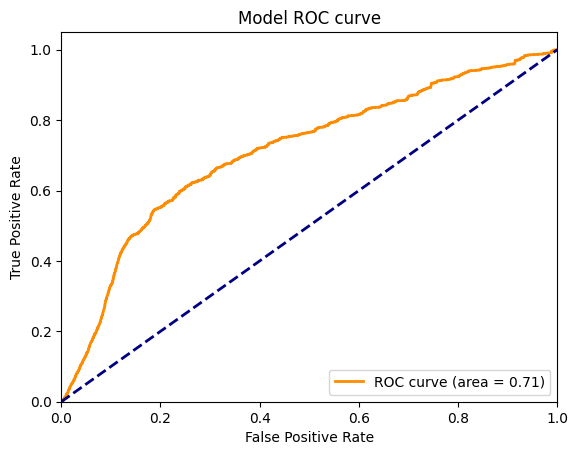

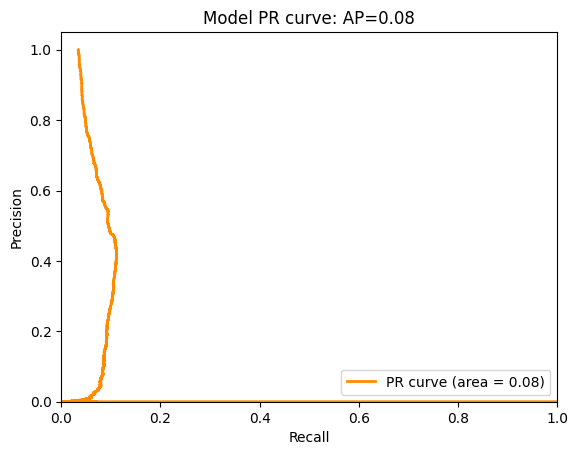

In [71]:
model, class_preds, pred_proba = train_fg(model, optim, loss, features, labels, g, g,
                                            test_mask, device, args.n_epochs,
                                            args.threshold,  args.compute_metrics)